<h1 class="heading"> Maneuver Test</h1>
<h1>Pitch holder autopilot</h1>

<h6 class="author"> — <b style="color:rgb(0,51,102);">Carmine Varriale, Agostino De Marco</b>, <i>University of Naples Federico II</i></h6>

## Introduction and setup
The purpose of this Notebook is to test a pitch holder autopilot to reduce high frequency oscillations during fast elevator maneuvers.<br>
Here's the modules and functions we are going to need

In [2]:
% run ./python/nb_init.py                        
% matplotlib inline                             

import data_handling as dh
from ACDataPlots import ACDataPlots

HTML(open('./style/style_unina_iwes.css', 'r').read())

and here's the list of external files we are going to use throughout the Notebook.

In [6]:
# Directory for output
dest_folder='../output/mantest_pitch_hold_ap/'

# Catalog to file
os.system('../JSBSim/JSBSim --root=../JSBSim/ --catalog=c172x_unina > ../JSBSim/catalog_c172x_unina.txt')

# Reference to script file
script_path='../JSBSim/scripts/c172x_mantest_pitch_hold_ap.xml'

# Reference to initialization file
init_path = '../JSBSim/aircraft/c172x_unina/init_mantest_pitch_hold_ap.xml'

## Script file analysis

In this case, our aircraft is initialized in a straight and leveled flight condition, on a horizontal flight path. Note that, at this stage, we are only specifying the flight path angle $\gamma$ and not the body attitude angle $\theta$ (which, in longitudinal symmetric flight, corresponds to a pitch angle). 
<br><br>

This is the initialization file:

In [7]:
dh.show_file(init_path)

   1| <?xml version="1.0"?>                                       
   2| 
   3| <!-- 
   4| Set the aircraft initial condition
   5| at 1000 feet above Sea Level, 
   6| over Naples, 
   7| on a heading of 90 degrees,
   8| on a horizontal flightpath,
   9| with engine running .
  10| -->
  11| 
  12| <initialize name="EngineRunning">
  13|    
  14|   <vt unit="KTS">        100.0  </vt>
  15|   <latitude unit="DEG">   40.0  </latitude>
  16|   <longitude unit="DEG">  14.2  </longitude>
  17|   <psi unit="DEG">        90.0  </psi>
  18|   <altitude unit="FT">  1000.0  </altitude>
  19|   <gamma unit="DEG">       0.0  </gamma>
  20|   <running>                0    </running>                                 
  21|  
  22| </initialize>

In the script, after trimming the aircraft in these initial conditions, we are initializing our reference heading and attitude around the pitch axis before starting the maneuver. This operation can be done in two ways:

1. By assigning an explicit value to the appropriate setpoint property, as it was done for <div class="typewr">ap/heading_setpoint</div>. In this case, its value corresponds to the initial value of the heading, which we actually know, and therefore it was easy for us to set it this way.
2. By referring to the value another property has at the time of setpoints initialization. This was done for the pitch angle, as we could not easily predict the value it could get after the trim.

<br>
To start our turn, we are continuously changing the heading reference setpoint, while the reference pitch angle is set to be fixed at its trim value. Gains for both roll and pitch autopilots should be eventually tuned for achieving the desired maneuver.
<br><br>

Check the script here:

In [8]:
dh.show_file(script_path)

   1| <?xml version="1.0"?>
   2| <?xml-stylesheet type="text/xsl" 
   3| 	href="http://jsbsim.sourceforge.net/JSBSimScript.xsl"?>
   4| 
   5| 
   6| <runscript xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
   7| 		xsi:noNamespaceSchemaLocation="http://jsbsim.sf.net/JSBSimScript.xsd"
   8| 		name="Script for C172x - Test for pitch hold autopilot">
   9| 
  10| 
  11|     <!--
  12|         C172x performing a turn and descent with autopilot to
  13|         keep the correct route and wings leveled. This script
  14|         is for testing the pitch holder autopilot during fast 
  15|         elevator maneuvers
  16|     -->
  17| 
  18|     <use aircraft="c172x_unina" initialize="init_mantest_pitch_hold_ap" />
  19|     <run start="0.0" end="300" dt="0.0083333"> 
  20| 
  21|         
  22|         <event name="Trim">
  23|             <description> Trim the aircraft in the initial conditions </description>
  24|             <condition> simulation/sim-time-sec ge 0 </condition>

## Simulation launch

From the charts below, you can see how $\theta$ has no long period oscillations, and altitude $h$ has no oscillation at all during both turn and descent.

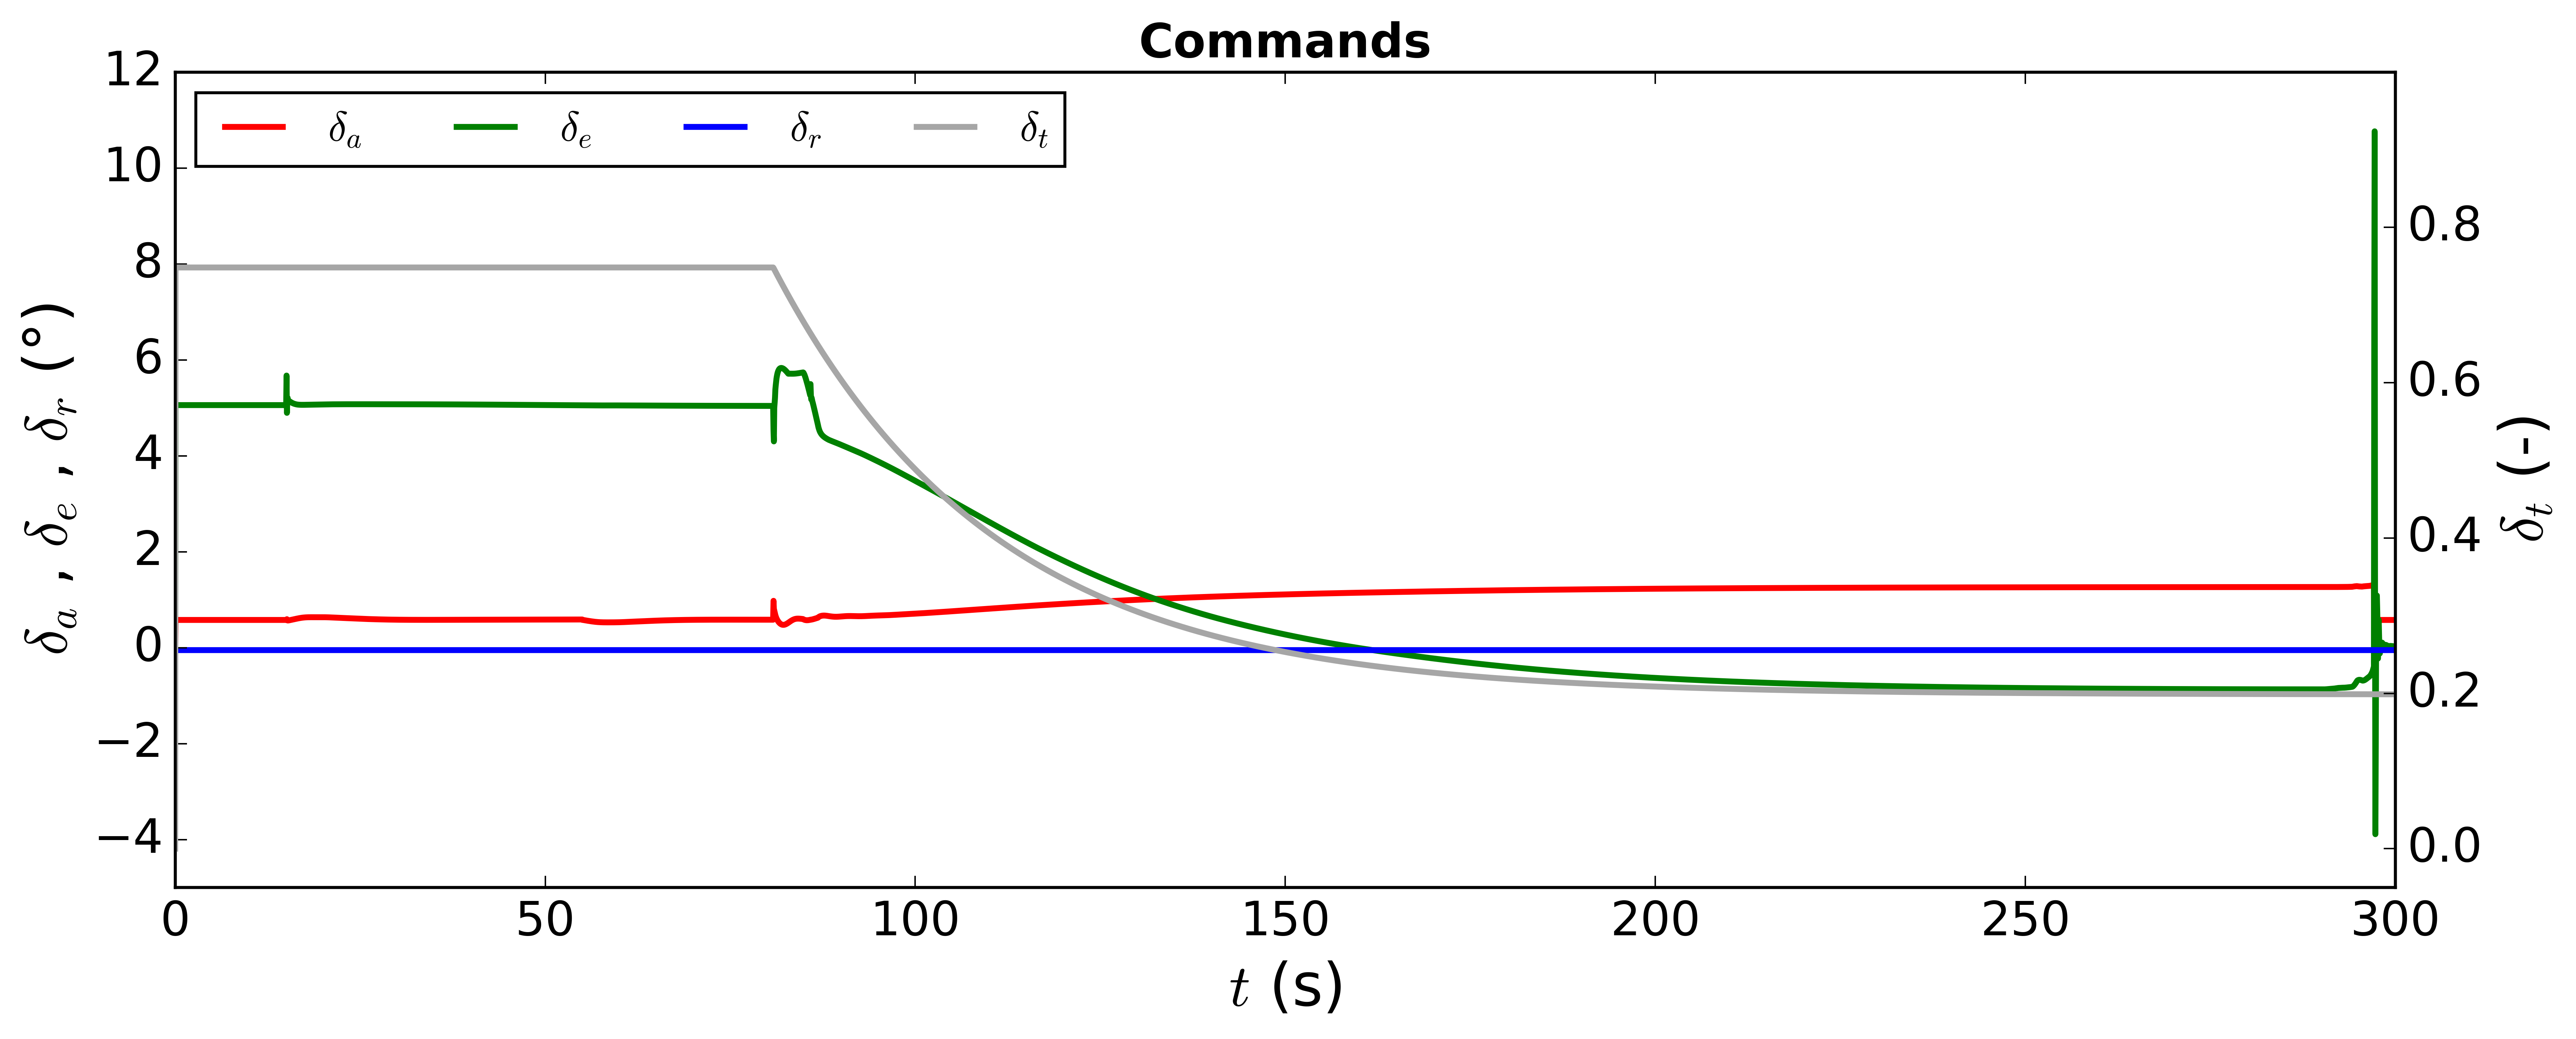

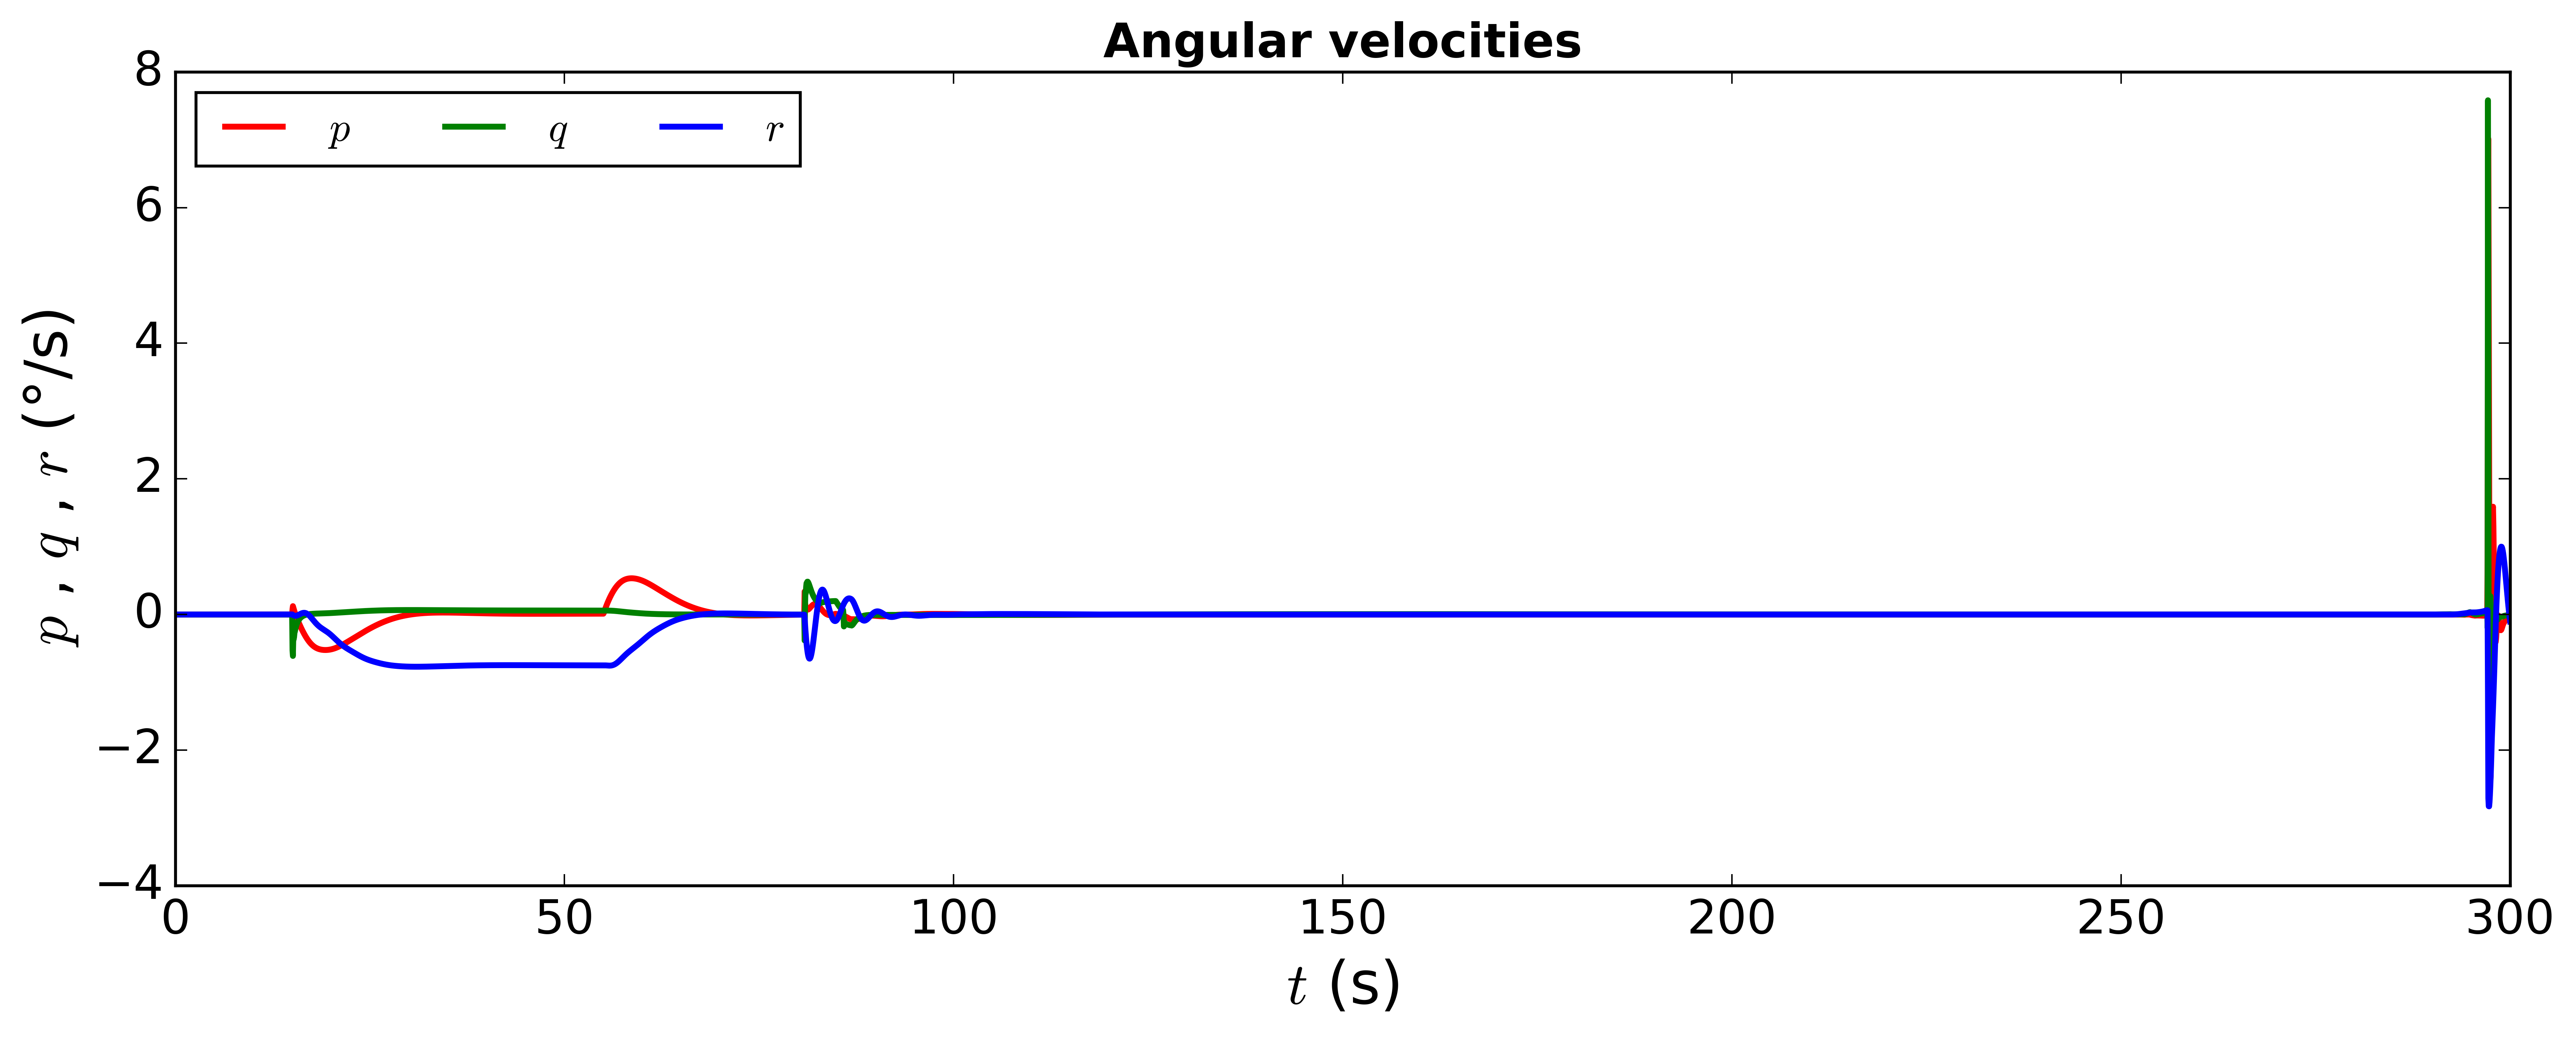

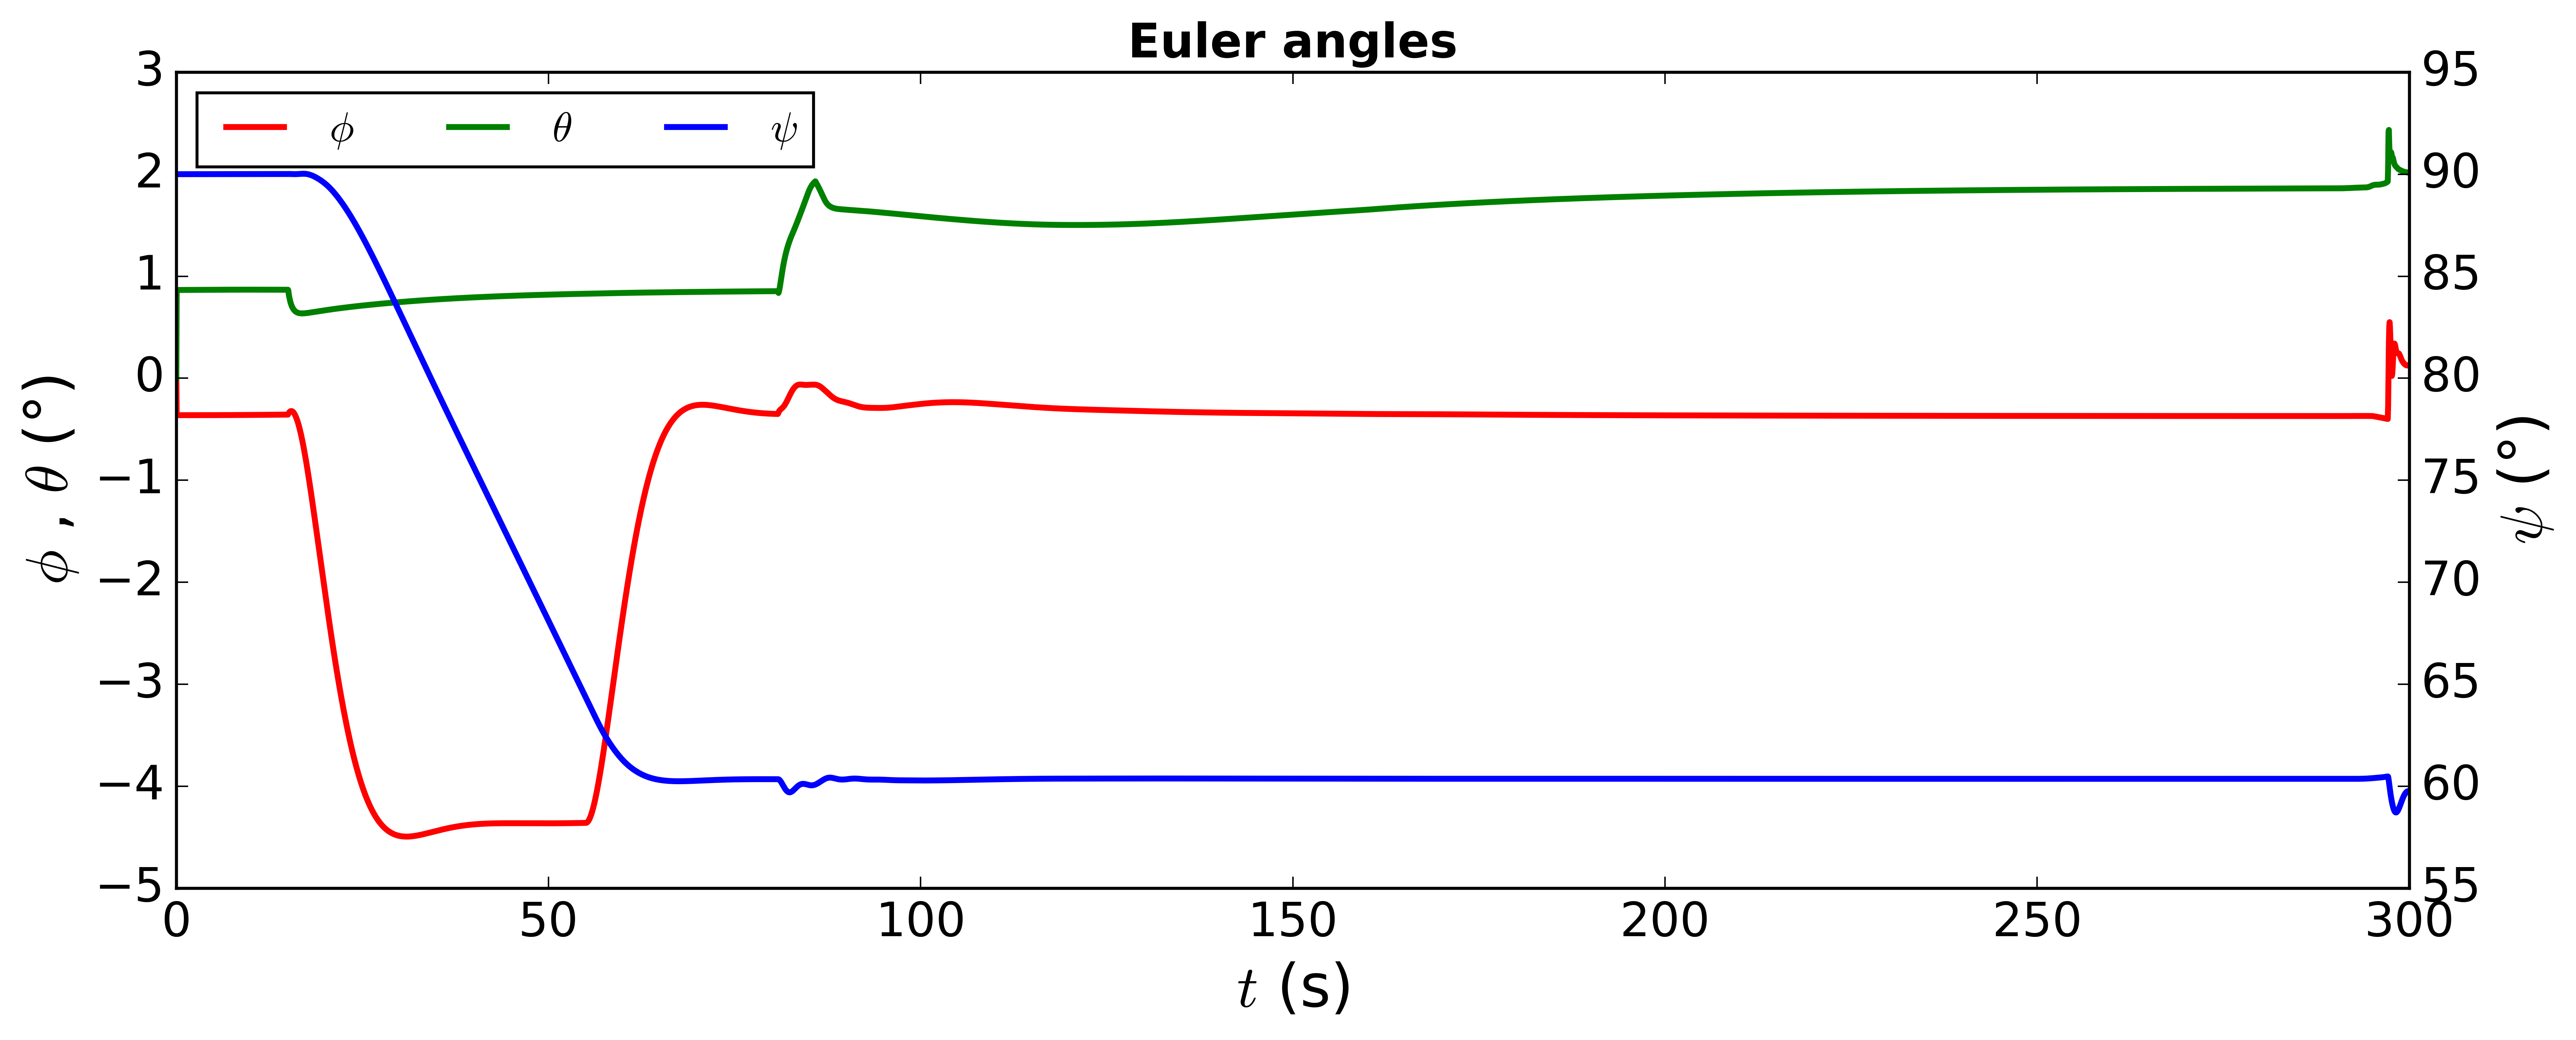

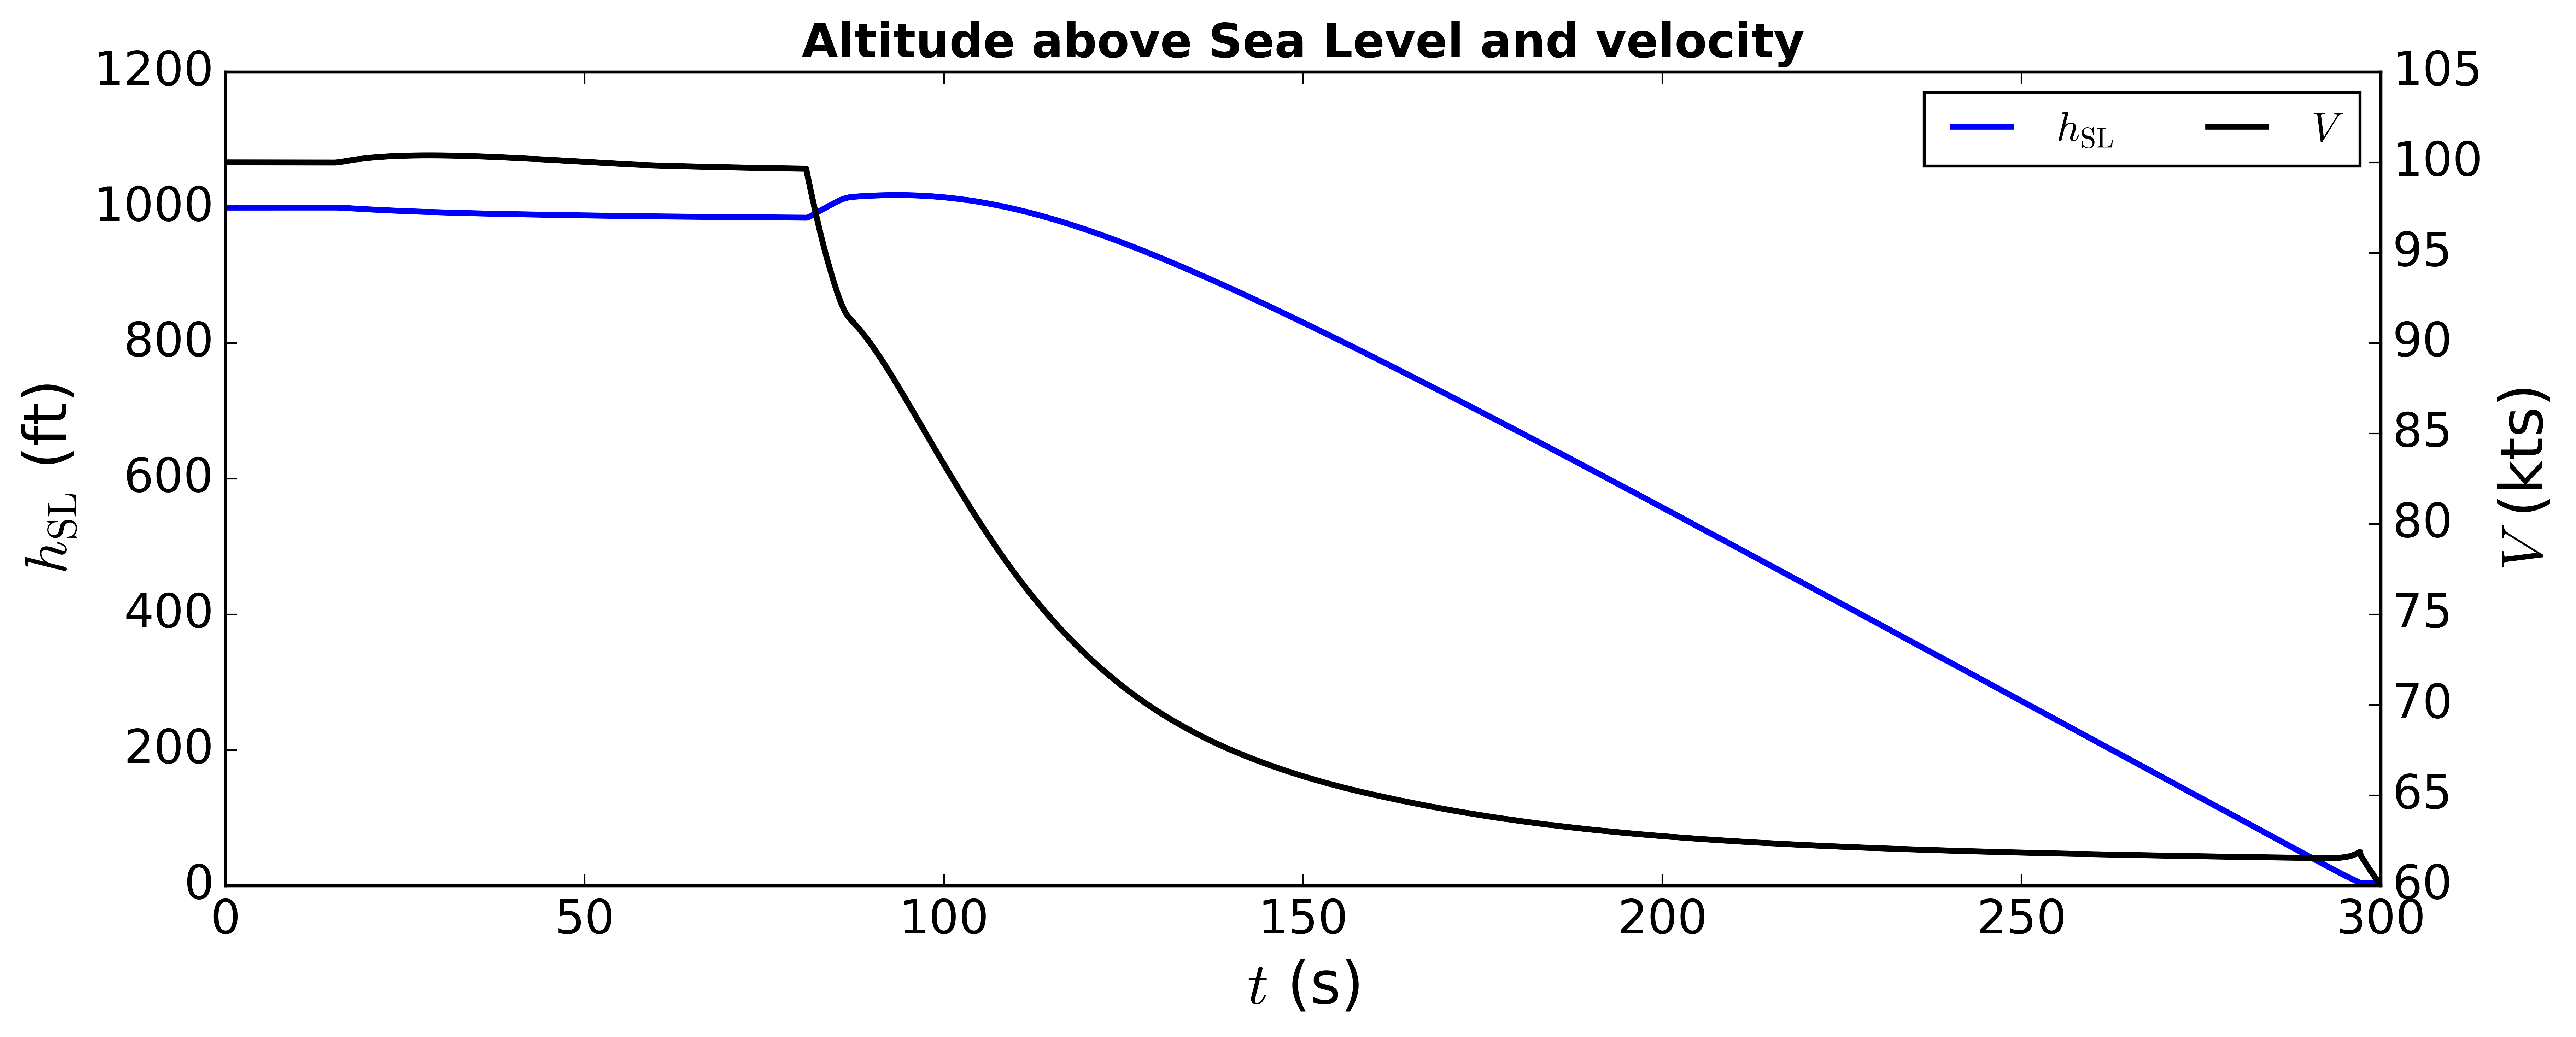

In [9]:
# JSBSim script launch command
os.system('../JSBSim/JSBSim --root=../JSBSim/ --script='+script_path+' > ../JSBSim/log_mantest_pitch_hold_ap.txt')

dh.move_files_to_folder('*.csv',dest_folder,'../JSBSim/')
dh.move_files_to_folder('*.txt',dest_folder,'../JSBSim/')

# Extract data arrays from output .csv files
sim = ACDataPlots('C172x_unina',dest_folder)

# Plot time histories
sim.plot_Commands()
sim.plot_AngularVel()
sim.plot_EulerAng()
sim.plot_AltitudeVelocity()

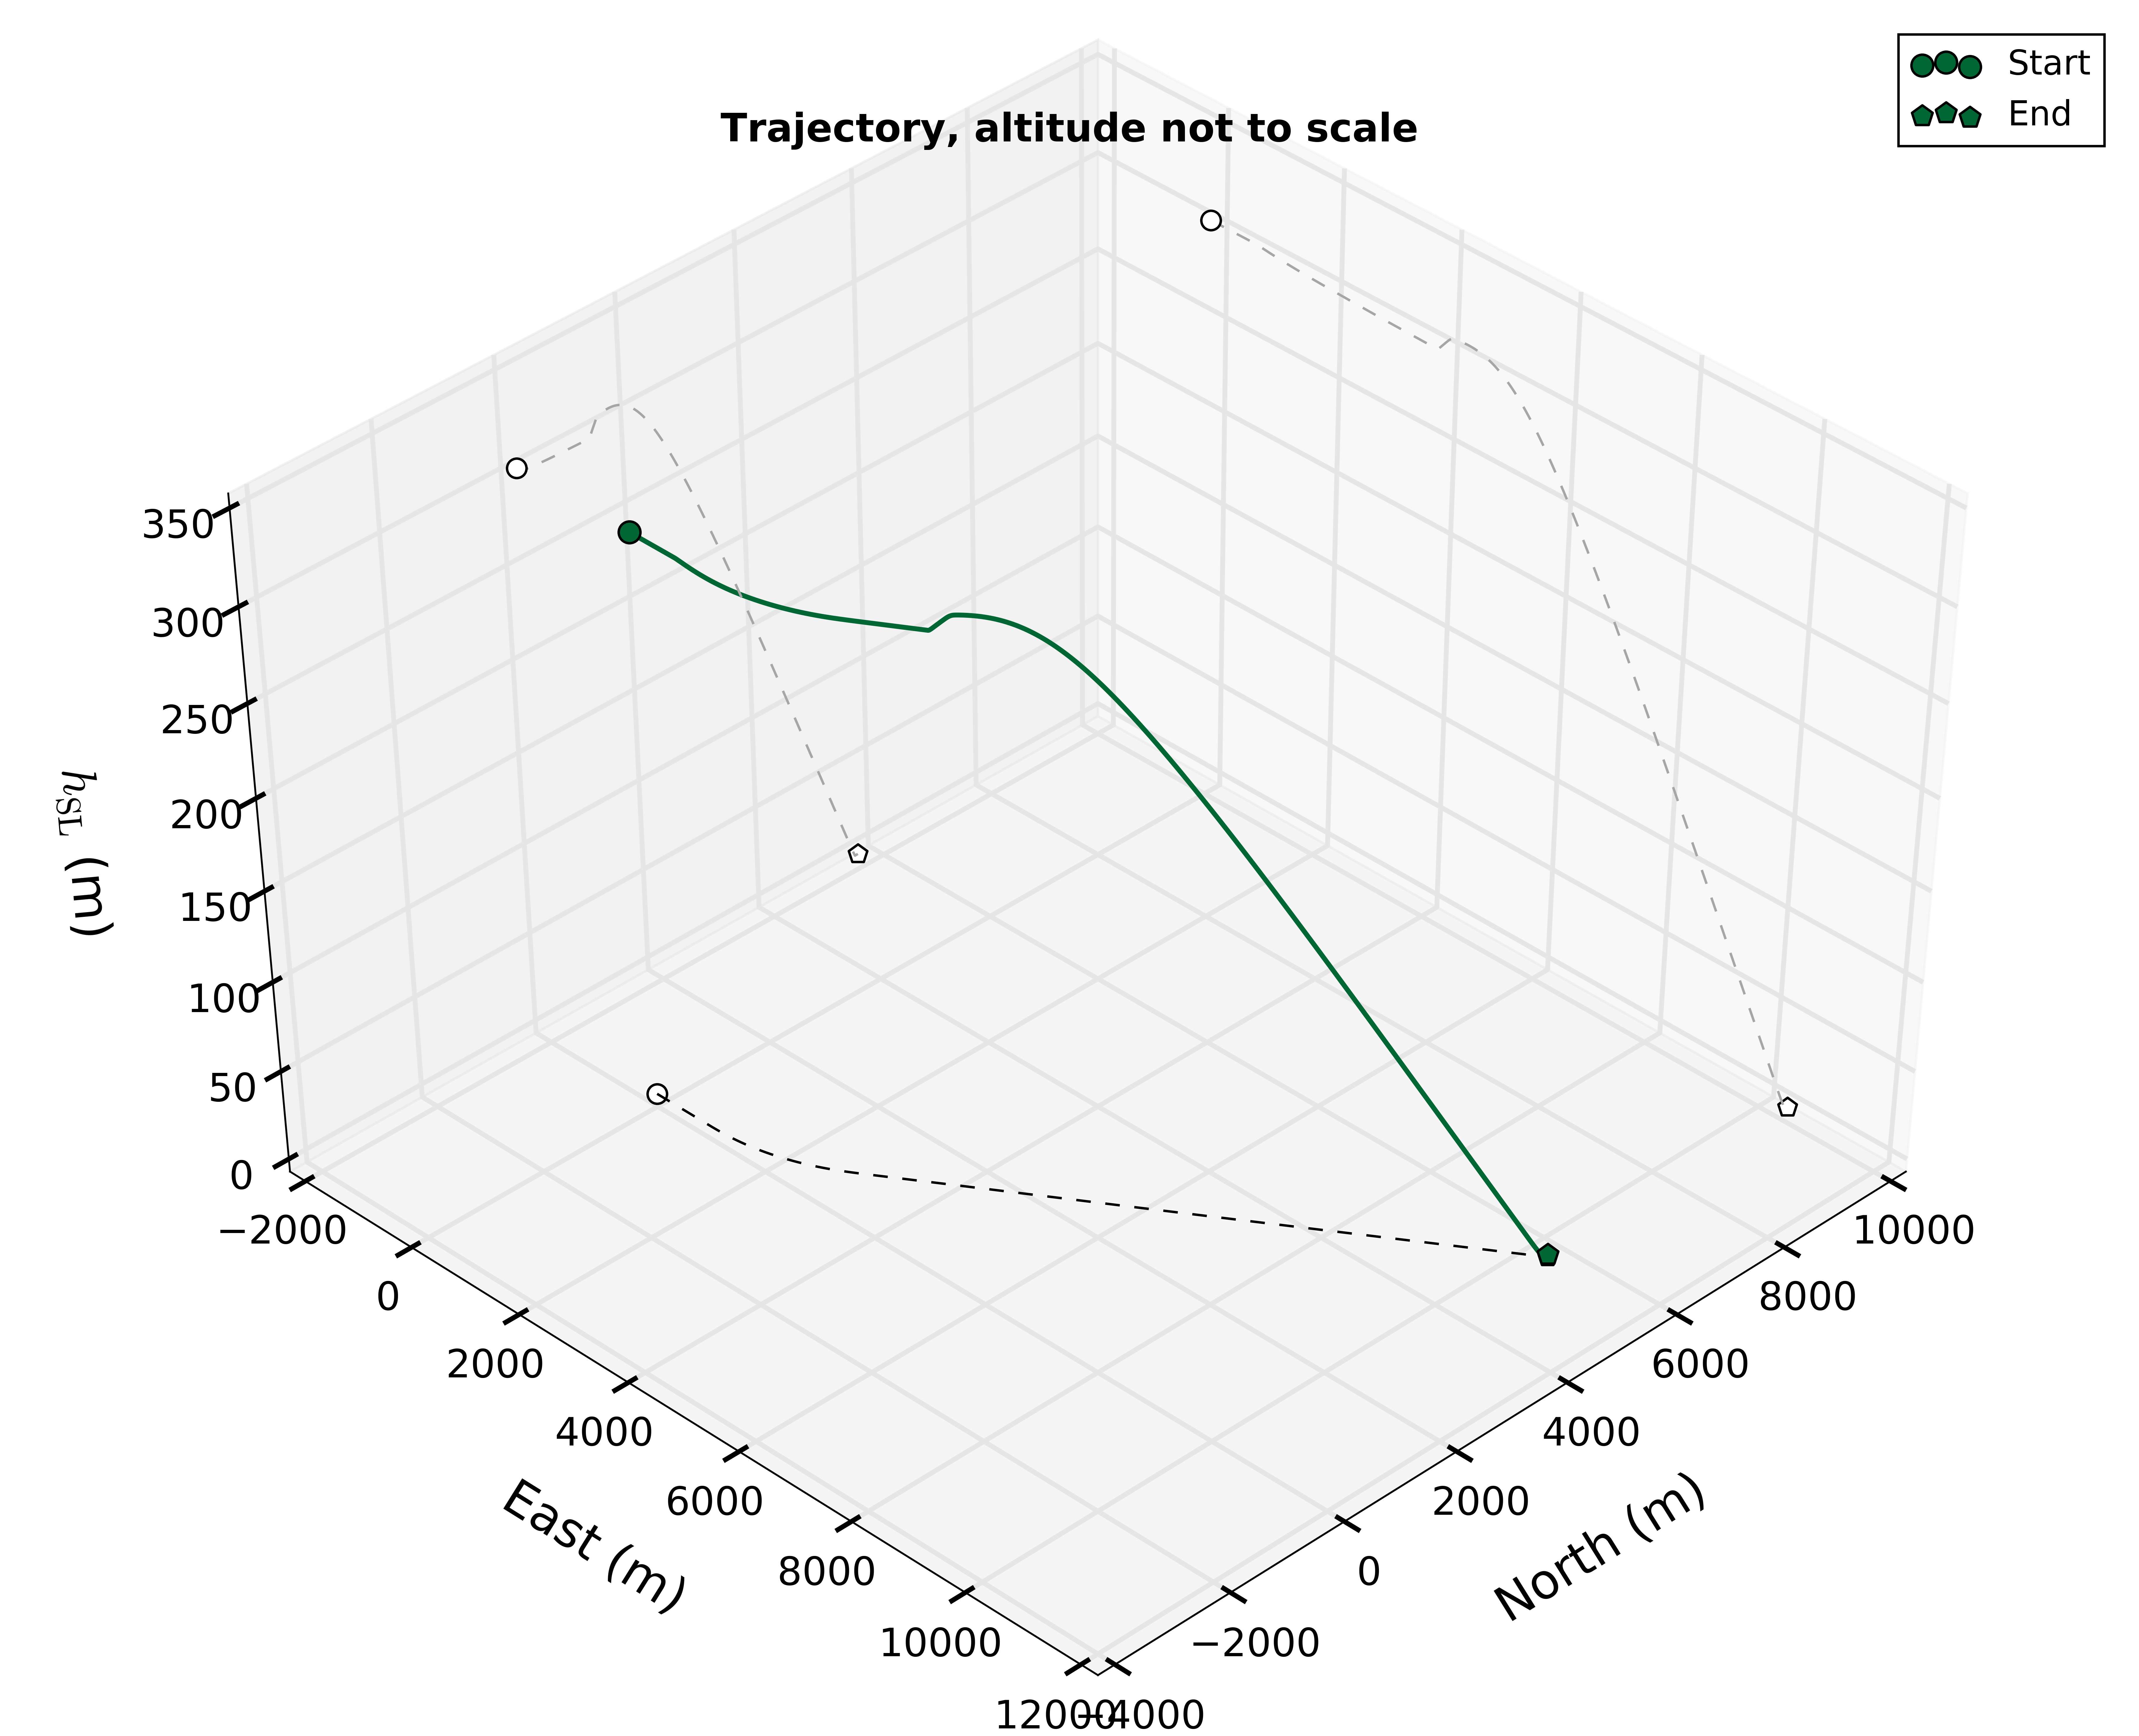

In [10]:
sim.get_traj_in_NEA()
sim.plot_GroundTrack()
sim.plot_traj3D_in_NEA(view=(45,45),Y_proj='W')